In [2]:
from transformers import pipeline
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

e:\healthai\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model="distilbert-base-uncased-finetuned-sst-2-english"
)

print("Sentiment model loaded successfully.")

Loading weights: 100%|██████████| 104/104 [00:00<00:00, 206.91it/s, Materializing param=pre_classifier.weight]                                  


Sentiment model loaded successfully.


In [4]:
feedback_data = [
    ("The doctor was very attentive and explained everything clearly.", "POSITIVE"),
    ("The waiting time was too long and staff seemed unorganized.", "NEGATIVE"),
    ("Treatment was effective and nurses were kind.", "POSITIVE"),
    ("Room cleanliness was poor and disappointing.", "NEGATIVE"),
    ("Excellent emergency response and fast admission process.", "POSITIVE"),
    ("Billing process was confusing and slow.", "NEGATIVE"),
    ("Very satisfied with the overall hospital service.", "POSITIVE"),
    ("The receptionist was rude and unhelpful.", "NEGATIVE"),
]

df = pd.DataFrame(feedback_data, columns=["text", "true_label"])
df.head()

,text,true_label
0,The doctor was very attentive and explained ev...,POSITIVE
1,The waiting time was too long and staff seemed...,NEGATIVE
2,Treatment was effective and nurses were kind.,POSITIVE
3,Room cleanliness was poor and disappointing.,NEGATIVE
4,Excellent emergency response and fast admissio...,POSITIVE


In [5]:
predictions = []
for text in df["text"]:
    result = sentiment_pipeline(text)[0]
    predictions.append(result["label"])
df["predicted_label"] = predictions
df.head()

,text,true_label,predicted_label
0,The doctor was very attentive and explained ev...,POSITIVE,POSITIVE
1,The waiting time was too long and staff seemed...,NEGATIVE,NEGATIVE
2,Treatment was effective and nurses were kind.,POSITIVE,POSITIVE
3,Room cleanliness was poor and disappointing.,NEGATIVE,NEGATIVE
4,Excellent emergency response and fast admissio...,POSITIVE,POSITIVE


In [6]:
print(classification_report(df["true_label"], df["predicted_label"]))

              precision    recall  f1-score   support

    NEGATIVE       1.00      1.00      1.00         4
    POSITIVE       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



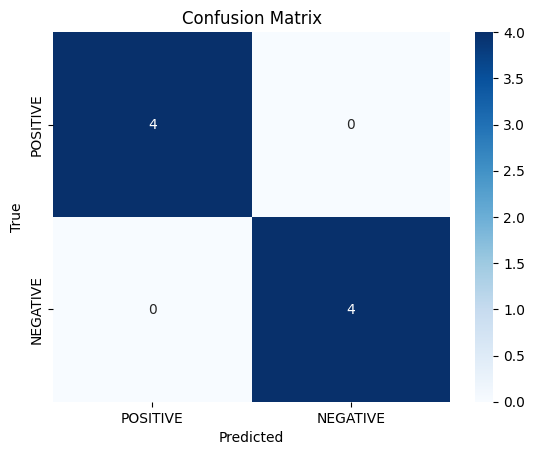

In [7]:
cm = confusion_matrix(df["true_label"], df["predicted_label"], labels=["POSITIVE", "NEGATIVE"])
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["POSITIVE", "NEGATIVE"], yticklabels=["POSITIVE", "NEGATIVE"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [8]:
sentiment_pipeline.model.save_pretrained("../models/sentiment_model")
sentiment_pipeline.tokenizer.save_pretrained("../models/sentiment_model")

Writing model shards: 100%|██████████| 1/1 [00:01<00:00,  1.82s/it]


('../models/sentiment_model\\tokenizer_config.json',
 '../models/sentiment_model\\tokenizer.json')